# NLP Codealong

In [302]:
from src.student_caller import one_random_student
from src.student_list import quanggang

In [303]:
from sklearn.datasets import fetch_20newsgroups

# Import our best friends
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [304]:
data = fetch_20newsgroups()
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [305]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

<a id='eda'></a>

## EDA

As always, we want to look at the basic shape of the data.  

In [194]:
X = pd.DataFrame(data['data'])
X.shape

(11314, 1)

In [14]:
X.head()

,0
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...


What form do we want the above dataframe to take? What does a row represent? What does a column represent?

In [15]:
# your answer here

In [16]:
one_random_student(quanggang)

Jamie


Let's take a look at one record.  What type of preprocessing steps should we take to isolate tokens of high semantic value?

In [71]:
X.iloc[3].values[0]

'From: jgreen@amber (Joe Green)\nSubject: Re: Weitek P9000 ?\nOrganization: Harris Computer Systems Division\nLines: 14\nDistribution: world\nNNTP-Posting-Host: amber.ssd.csd.harris.com\nX-Newsreader: TIN [version 1.1 PL9]\n\nRobert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:\n> > Anyone know about the Weitek P9000 graphics chip?\n> As far as the low-level stuff goes, it looks pretty nice.  It\'s got this\n> quadrilateral fill command that requires just the four points.\n\nDo you have Weitek\'s address/phone number?  I\'d like to get some information\nabout this chip.\n\n--\nJoe Green\t\t\t\tHarris Corporation\njgreen@csd.harris.com\t\t\tComputer Systems Division\n"The only thing that really scares me is a person with no sense of humor."\n\t\t\t\t\t\t-- Jonathan Winters\n'

Answer here

In [ ]:
one_random_student(quanggang)

## Frequency Distributions

Let's look at the frequency distribution of all the words in the corpus.  To do so, we will use the FreqDist class from nltk.  

The FreqDist methods expect to receive a list of tokens, so we need to do a little preprocessing. We will use the RegexpTokenizer from nltk.  

There are a few places in this notebook where regular expressions will prove useful. 

Let's look at this tool [regexr](https://regexr.com/) and try to figure out the very basic pattern to match any word.


In [196]:
# Instantiate a RegexpTokenizer object and pass that pattern as the pattern argument

from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer 

rt = RegexpTokenizer()

TypeError: __init__() missing 1 required positional argument: 'pattern'

In [ ]:
one_random_student(quanggang)

In [190]:
#__SOLUTION__
# Pass that pattern into our RegexpTokenizer

from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer 

rt = RegexpTokenizer(pattern = '\w+' )

In [186]:
# Join all of the words 
all_docs = ' '.join(list(X_train[0]))

# use the rt object's tokenize method to create a list of all of the tokens
all_words = None

In [ ]:
one_random_student(quanggang)

In [ ]:
#__SOLUTION__
# Join all of the words 
all_docs = ' '.join(list(X_train[0]))
# use the rt object's tokenize method to create a list of all of the tokens
all_words = rt.tokenize(all_docs)

In [191]:
# Instantiate a FreqDist object and pass allwords into it

# use the most_common method to see the 10 most common words


In [ ]:
one_random_student(quanggang)

In [242]:
#__SOLUTION__
# Instantiate a FreqDist object and pass allwords into it
fd = FreqDist(all_words)

# use the most_common method to see the 10 most common words
fd.most_common(10)

[('the', 97520),
 ('to', 53636),
 ('of', 50724),
 ('a', 42974),
 ('AX', 41899),
 ('and', 41313),
 ('I', 39088),
 ('is', 31244),
 ('in', 29504),
 ('that', 27895)]

## Visualize the distribution of the target with a bar chart

In [58]:
y = data['target']

In [59]:
# Target classes
data['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [243]:
# Bar Chart Here (horizontal, preferably)

In [244]:
one_random_student(quanggang)

Jamie


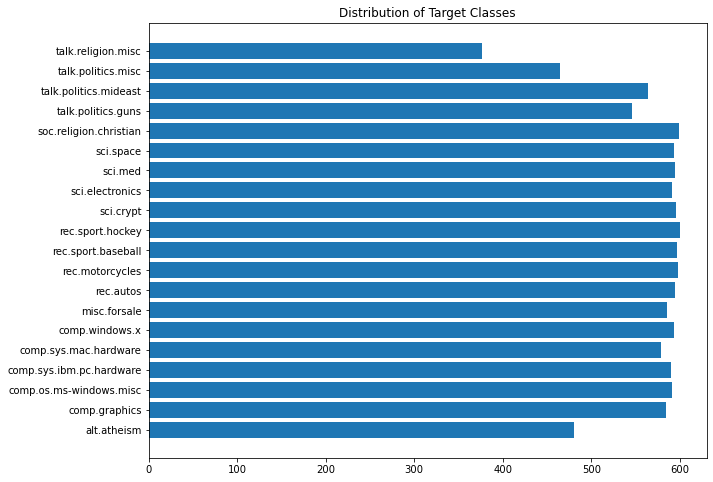

In [63]:
#__SOLUTION__
fig, ax = plt.subplots(figsize=(10,8))
counts = np.unique(y, return_counts=True)[0]
labels = np.unique(y, return_counts=True)[1]
ax.barh(counts, labels)
ax.set_yticks(range(0,len(data.target_names)))
ax.set_yticklabels(data.target_names)
ax.set_title('Distribution of Target Classes')
ax.set_ylabel;

## Quick Model

Our model validation principles are consistent with NLP modeling.   
We split our data in the same way, ideally with a hold out set.   


In [ ]:
# Train Test Split


In [73]:
#__SOLUTION__
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [111]:
X_train[0]

1513     From: DSHAL@vmd.cso.uiuc.edu\nSubject: Re: Cli...
6814     From: david@stat.com (David Dodell)\nSubject: ...
7846     From: mouse@thunder.mcrcim.mcgill.edu (der Mou...
2980     From: chen@citr.uq.oz.au (G. Chen)\nSubject: H...
6075     From: thor@surt.atd.ucar.edu (Richard E. Neitz...
                               ...                        
11284    Distribution: world\nFrom: elenay_creations@tc...
5191     From: jnielsen@magnus.acs.ohio-state.edu (John...
5390     From: keith@cco.caltech.edu (Keith Allan Schne...
860      From: jake@bony1.bony.com (Jake Livni)\nSubjec...
7270     From: smorris@venus.lerc.nasa.gov (Ron Morris ...
Name: 0, Length: 8485, dtype: object

## Count Vectorizor

A count vectorizor takes as input all of the documents in their raw form.  That being the case, if we are doing any preprocessing, such as custom transformations like lemming and stemming, we will need to recombine the tokens into the original documents.  

For our FSM, we will pass our documents into the vectorizer in their raw form.

In [245]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a CountVectorizor object 
cv = None

In [246]:
one_random_student(quanggang)

Jamie


In [198]:
#__SOLUTION__
from nltk.corpus import stopwords

cv = CountVectorizer(stop_words=stopwords.words('english'), token_pattern='[a-zA-Z]+' )

### Question: 

Look at all those wonderful parameters.  What parameters would be useful to test out? 

Let's look at our regular expressions again, and add a better pattern.

[regexr](https://regexr.com/)

In [ ]:
# Instantiate a better CountVectorizer with stopwords, a regular expression pattern, and whatever else you would like  

In [ ]:
one_random_student(quanggang)

With our CountVectorizer, we apply the same principles of model validation as we have with other data.  Fit on the training set, and transform both the train and test with that fit object. This will create a vocabulary associated with high predictive value built off of the training vocabulary. 

In [208]:
cv.fit_transform(X_train[0])

<8485x79190 sparse matrix of type '<class 'numpy.int64'>'
	with 981634 stored elements in Compressed Sparse Row format>

### DataFrame from sparse and get feature names

As we see above, the fit_transform method returns a sparse matrix.  Luckily, our alogrithms will handle sparse matrices, as we will see below.  But, if we want, we can convert our sparse matrix to a fully expressed dataframe using the .from_spmatrix method taken from DataFrame.sparse

In [211]:
# convert the sparse matrix from above to a dataframe
X_train_vec = None

In [ ]:
one_random_student(quanggang)

In [249]:
#__SOLUTION__
X_train_vec = pd.DataFrame.sparse.from_spmatrix(cv.fit_transform(X_train[0]))

AttributeError: 'NoneType' object has no attribute 'fit_transform'

We can also add the words as column names using cv.get_feature_names()

In [247]:
# Add words as column names

In [248]:
#__SOLUTION__
# Add words as column names
X_train_vec.columns = cv.get_feature_names()
X_train_vec.head()

AttributeError: 'NoneType' object has no attribute 'get_feature_names'

As mentioned above, we don't necessarily need the feature names present to build our model.

Let's build a model with the count vectorizer from above, and use sklearns pipeline and cross_validate to see how accurately we can classify the documents.

We will apply a CountVectorizor and then a multinomial naive bayes classifier.

In [233]:
# import make_pipeline
# import MultinomialNB
# import cross_validate

# create a pipeline object with our CountVectorizer and Multinomial Naive Bayes as our steps

# feed the pipeline into cross_validate along with X_train[0] and y_train

In [255]:
one_random_student(quanggang)

Christos


In [257]:
#__SOLUTION__ 
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate

# create a pipeline object 
fsm_pipe = make_pipeline(CountVectorizer(stop_words=stopwords.words('english'), token_pattern='[a-zA-Z]+' ), MultinomialNB() )
cross_validate(fsm_pipe, X_train[0], y_train, return_train_score=True, scoring='f1_micro')

{'fit_time': array([1.31140304, 1.34622407, 1.32734108, 1.36256218, 1.2426579 ]),
 'score_time': array([0.28266478, 0.30783796, 0.31305885, 0.29179311, 0.26753926]),
 'test_score': array([0.83500295, 0.83500295, 0.83677077, 0.84855628, 0.84384207]),
 'train_score': array([0.93945197, 0.94210371, 0.9435769 , 0.93856806, 0.94446081])}

Now that we have a funcitonal pipeline, we have the framework to easily test out new parameters and models. Try n-grams, min_df/max_df, tfidf vectorizers, better token patterns.  Try Random Forests, XGBoost, and SVM's. The world is your oyster.

![MrBean_oysters](https://media.giphy.com/media/KZepR2JrdDbI0NYVMs/giphy.gif)

In [253]:
#__SOLUTION__
'Random Forest did not perform very well'
from sklearn.ensemble import RandomForestClassifier
fsm_pipe = make_pipeline(CountVectorizer(stop_words=stopwords.words('english'), 
                                         token_pattern= "[a-zA-Z]+(?:'[a-z]+)?", 
                                         min_df=3, 
                                        max_df=10), RandomForestClassifier(n_estimators=10) )

cross_validate(fsm_pipe, X_train[0], y_train, return_train_score=True)

KeyboardInterrupt: 

In [258]:
# Of course, when we are finished tuning our model, we fit on the entire training set, and score on the test.
fsm_pipe.fit(X_train[0], y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 token_pattern='[a-zA-Z]+')),
                ('multinomialnb', MultinomialNB())])

In [262]:
y_hat_test = fsm_pipe.predict(X_test[0])

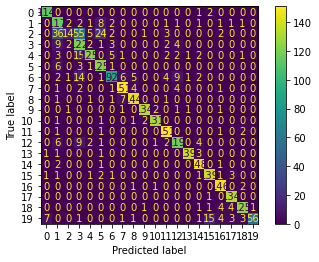

In [265]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(fsm_pipe,X_test[0], y_test)